In [2]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft

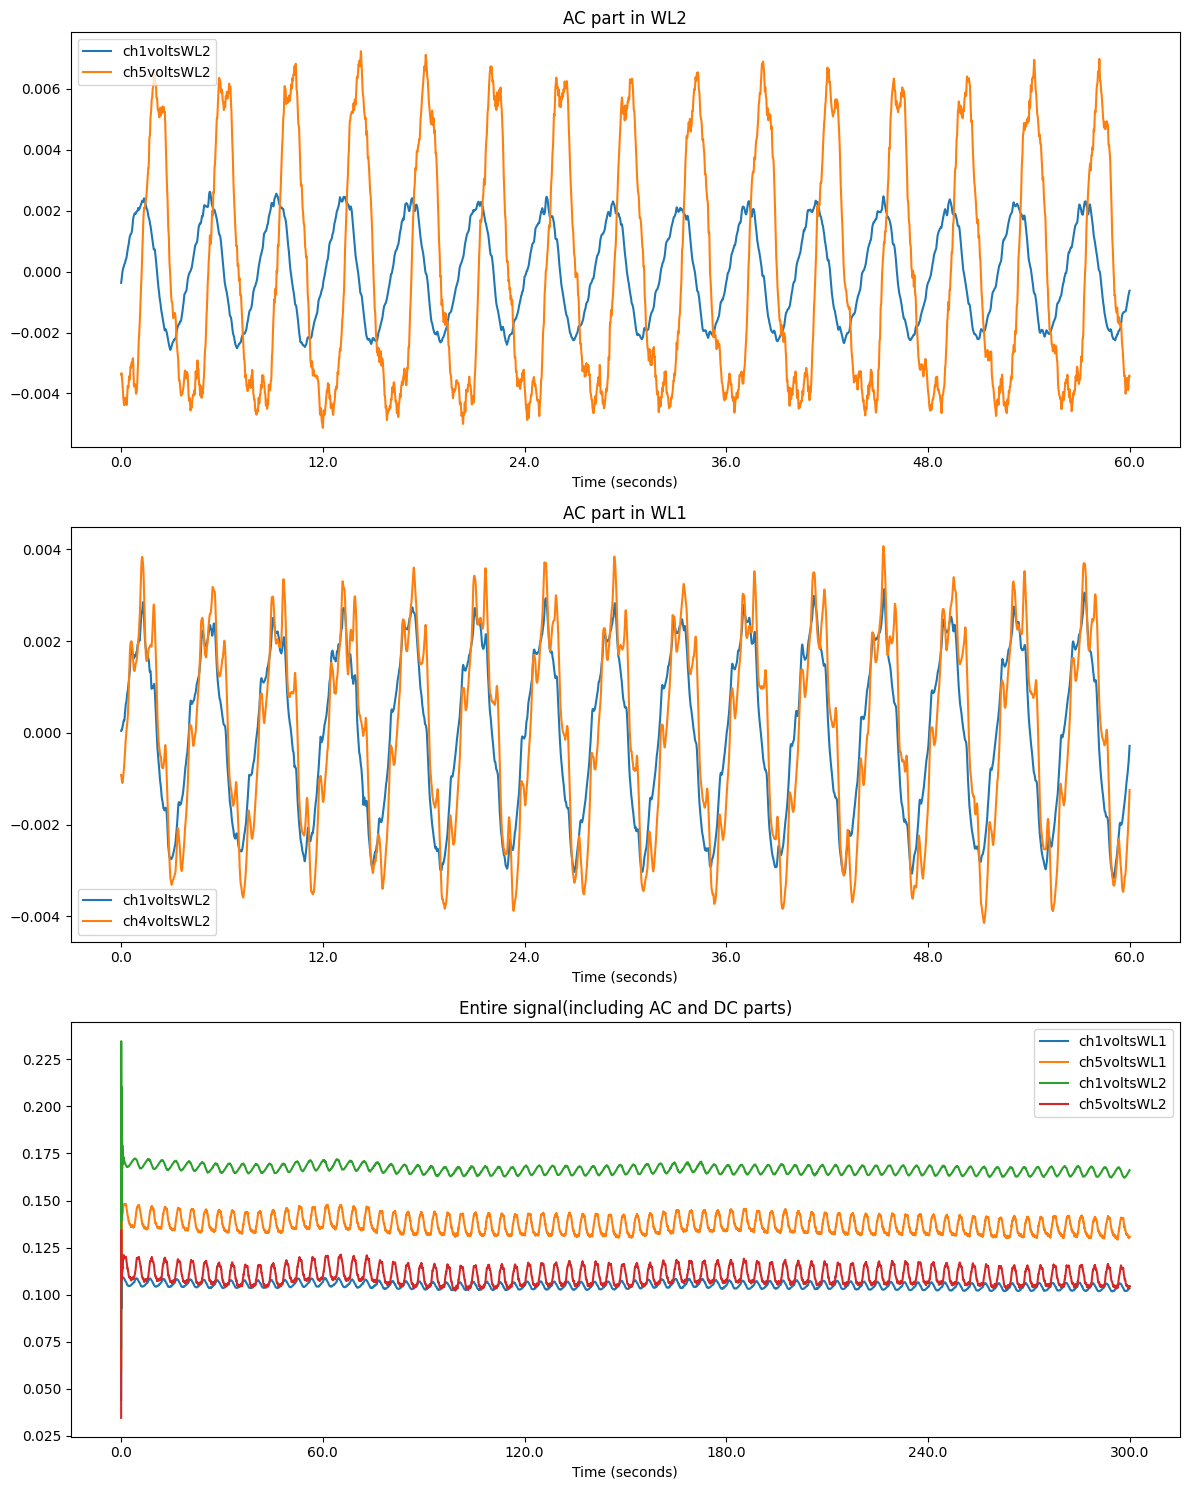

In [8]:

df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\CW_extract_04-27-22.csv')
df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R3.csv')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

def set_axis_labels(ax, max_time):
    time_ticks = np.linspace(0, max_time, 6)  # 从0到max_time等分
    normalized_ticks = np.linspace(0, 1, 6)  # 从0到1等分
    ax.set_xticks(normalized_ticks)
    ax.set_xticklabels(time_ticks)
    ax.set_xlabel('Time (seconds)')

# 为df1绘图并设置标题
time_normalized = np.linspace(0, 1, len(df1))
for column in df1.columns:
    axes[0].plot(time_normalized, df1[column], label=column)
set_axis_labels(axes[0], 60)  # 为df1设置最大时间值60
axes[0].set_title('AC part in WL2')
axes[0].legend()

# 为df3绘图并设置标题
time_normalized = np.linspace(0, 1, len(df3))
for column in df3.columns:
    axes[1].plot(time_normalized, df3[column], label=column)
set_axis_labels(axes[1], 60)  # 为df3设置最大时间值60
axes[1].set_title('AC part in WL1')
axes[1].legend()

# 为df2绘图并设置标题
time_normalized = np.linspace(0, 1, len(df2))
for column in df2.columns:
    axes[2].plot(time_normalized, df2[column], label=column)
set_axis_labels(axes[2], 300)  # 为df2设置最大时间值300
axes[2].set_title('Entire signal(including AC and DC parts)')
axes[2].legend()

plt.tight_layout()
plt.show()

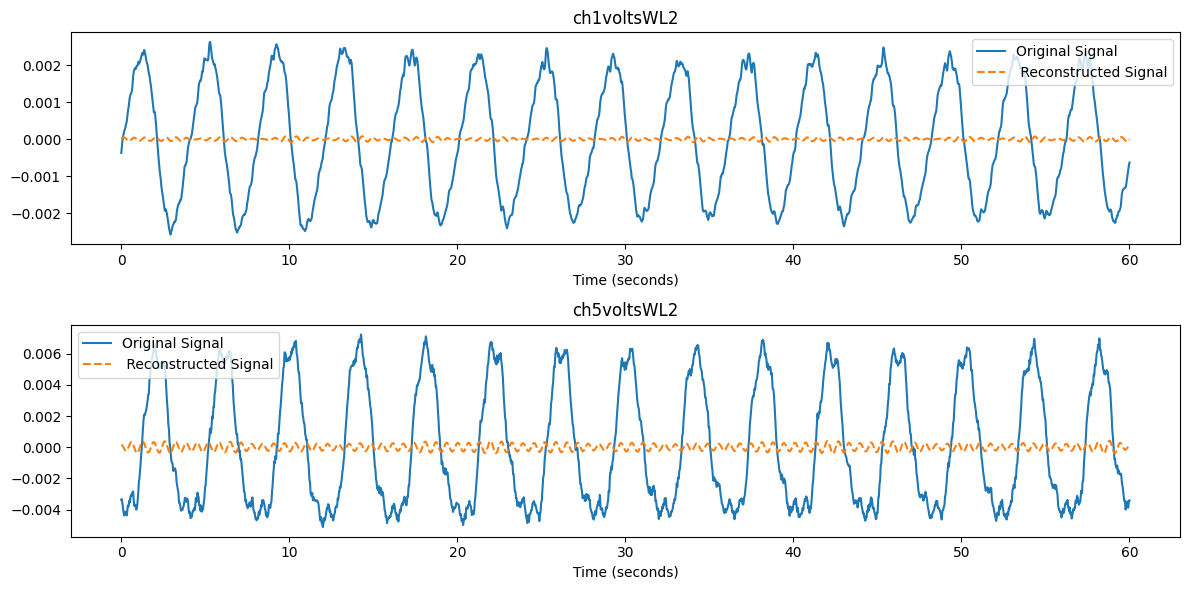

In [5]:
df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\CW_extract_04-27-22.csv')

# 采样频率
fs = 80  # 采样频率设置为80Hz

# FFT变换
fft_results = {}
for column in df1.columns:
    fft_results[column] = np.fft.fft(df1[column])

# 设计滤波器
def bandpass_filter(freq, lowcut=1.0, highcut=2.0):
    return (freq > lowcut) & (freq < highcut)

# 应用滤波器
filtered_fft = {}
freqs = np.fft.fftfreq(len(df1), 1/fs)
for column in fft_results:
    filter_mask = bandpass_filter(freqs, 1.5 - 0.5, 1.5 + 0.5)
    filtered_fft[column] = np.copy(fft_results[column])
    filtered_fft[column][~filter_mask] = 0

# 逆FFT变换并扩大信号
reconstructed_signals = {column: np.fft.ifft(filtered_fft[column]).real  for column in filtered_fft}

# 总时长计算
total_duration = len(df1) / fs  # 总采样点数除以采样频率得到总时长

# 生成时间序列
time_series = np.linspace(0, total_duration, len(df1))

# 绘图比较
fig, axes = plt.subplots(nrows=len(df1.columns), ncols=1, figsize=(12, len(df1.columns)*3))

for i, column in enumerate(df1.columns):
    axes[i].plot(time_series, df1[column], label='Original Signal')
    axes[i].plot(time_series, reconstructed_signals[column], label='' Reconstructed Signal', linestyle='--')
    axes[i].set_title(column)
    axes[i].set_xlabel('Time (seconds)')
    axes[i].legend()

plt.tight_layout()
plt.show()


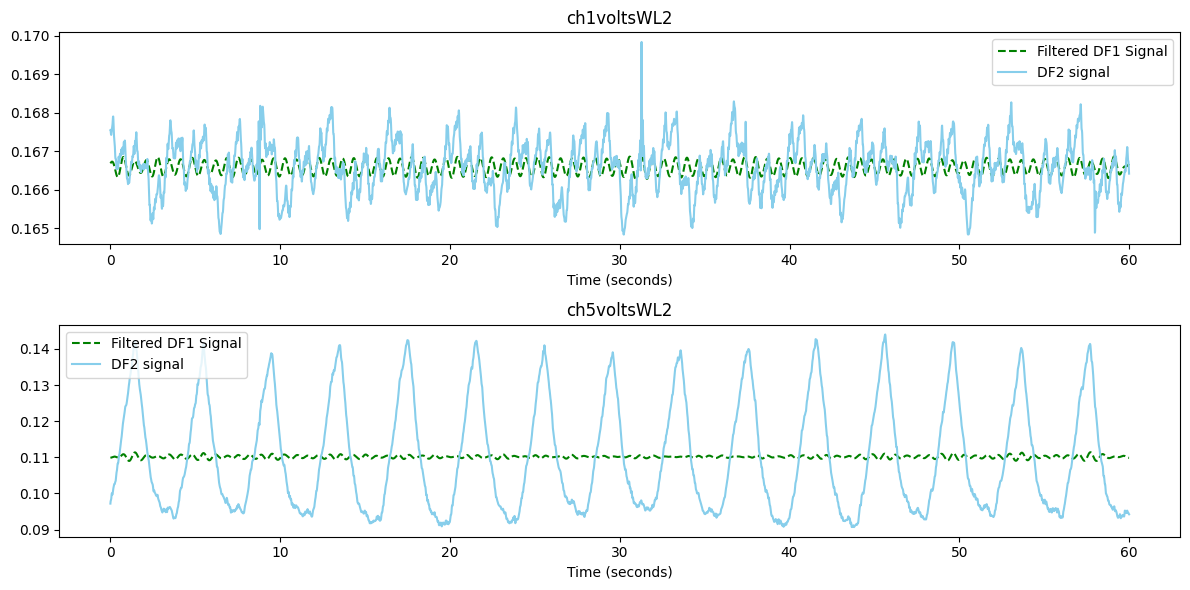

In [3]:
df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\07252022_sheep\\CW_extract_07-25-22.csv')

fs = 80  # 采样频率设置为80Hz

# FFT变换
fft_results = {}
for column in df1.columns:
    fft_results[column] = np.fft.fft(df1[column])

# 设计滤波器
def bandpass_filter(freq, lowcut=1.0, highcut=2.0):
    return (freq > lowcut) & (freq < highcut)

# 应用滤波器
filtered_fft = {}
freqs = np.fft.fftfreq(len(df1), 1/fs)
for column in fft_results:
    filter_mask = bandpass_filter(freqs, 1.5 - 0.5, 1.5 + 0.5)
    filtered_fft[column] = np.copy(fft_results[column])
    filtered_fft[column][~filter_mask] = 0

# 逆FFT变换
reconstructed_signals = {column: np.fft.ifft(filtered_fft[column]).real for column in filtered_fft}

# 扩大滤波后的信号
amplified_signals = {column: signal * 3 for column, signal in reconstructed_signals.items()}  # 扩大2倍

# DC部分的值
dc_values = {
    'ch1voltsWL2': 0.16658099127567208,
    'ch5voltsWL2': 0.11014730405743865
}

# 加上DC部分
for column in df1.columns:
    if column in dc_values:
        df1[column] += dc_values[column]
        reconstructed_signals[column] += dc_values[column]
        amplified_signals[column] += dc_values[column]

time_series = np.linspace(0, 60, len(df1))


fig, axes = plt.subplots(nrows=len(df1.columns), ncols=1, figsize=(12, len(df1.columns)*3))

for i, column in enumerate(df1.columns):
    if column in dc_values:
        axes[i].plot(time_series, reconstructed_signals[column], label='Filtered DF1 Signal', linestyle='--', color='green')
        axes[i].plot(time_series, df1[column], label='DF2 signal', color='skyblue')
        
        axes[i].set_title(column)
        axes[i].set_xlabel('Time (seconds)')
        axes[i].legend()

plt.tight_layout()
plt.show()



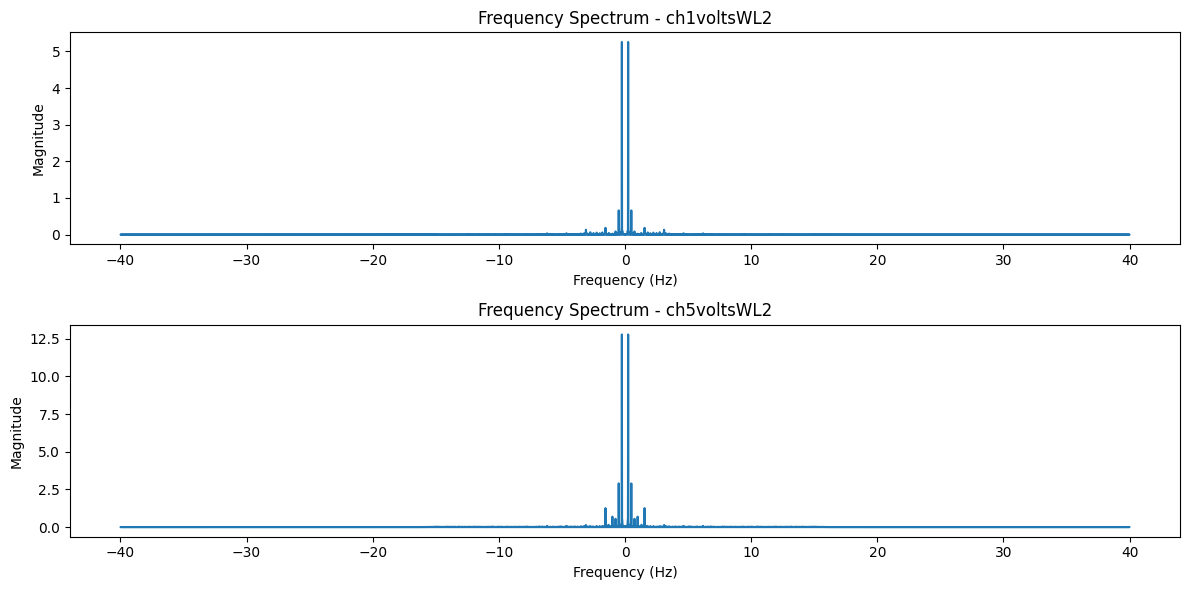

Relative Change (Time Domain): 0.005221932114882504
MHR Relative Change (Frequency Domain): 0.001482415961401139
FHR Relative Change (Frequency Domain): 0.0011963583055051795


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\CW_extract_04-27-22.csv')
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')

# 采样频率
fs = 80

# FFT变换
fft_results = {}
for column in df1.columns:
    fft_results[column] = np.fft.fft(df1[column])

# 绘制频率谱图
fig, axes = plt.subplots(nrows=len(df1.columns), ncols=1, figsize=(12, len(df1.columns)*3))
freqs = np.fft.fftfreq(len(df1), 1/fs)
for i, column in enumerate(df1.columns):
    axes[i].plot(freqs, np.abs(fft_results[column]))
    axes[i].set_title(f'Frequency Spectrum - {column}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Magnitude')
plt.tight_layout()
plt.show()

# 确定MHR和FHR的频率范围
mhr_freq_range = (1.5 - 0.5, 1.5 + 0.5)  # 示例范围,请根据频率谱图调整
fhr_freq_range = (3.5 - 0.5, 3.5 + 0.5)  # 示例范围,请根据频率谱图调整

# 提取ch1voltsWL2列
ch1voltsWL2 = df3['ch1voltsWL2']

# 时域分析
time_series = np.arange(len(ch1voltsWL2)) / fs

# 确定典型周期
mhr_period = 1 / np.mean(mhr_freq_range)
num_samples_per_period = int(mhr_period * fs)
num_periods = len(ch1voltsWL2) // num_samples_per_period

# 选取一个典型周期
typical_period_start = num_samples_per_period * (num_periods // 2)
typical_period_end = typical_period_start + num_samples_per_period
typical_period = ch1voltsWL2[typical_period_start:typical_period_end]

Imax = np.max(typical_period)
Imin = np.min(typical_period)
relative_change_time_domain = (Imax - Imin) / Imax
print(f'Relative Change (Time Domain): {relative_change_time_domain}')

# 频域分析
fft_ch1voltsWL2 = np.fft.fft(ch1voltsWL2)
freqs = np.fft.fftfreq(len(ch1voltsWL2), 1/fs)

# 将频谱转换为功率谱
power_spectrum = np.abs(fft_ch1voltsWL2)**2 / len(fft_ch1voltsWL2)

# 排除0频率处的DC信号
power_spectrum[0] = 0

# 滤波以提取MHR和FHR的具体信号
mhr_mask = (freqs >= mhr_freq_range[0]) & (freqs <= mhr_freq_range[1])
fhr_mask = (freqs >= fhr_freq_range[0]) & (freqs <= fhr_freq_range[1])
mhr_power = np.sum(power_spectrum[mhr_mask])
fhr_power = np.sum(power_spectrum[fhr_mask])

# 计算频域相对变化
total_power = np.sum(power_spectrum)
mhr_relative_change_freq = mhr_power / total_power
fhr_relative_change_freq = fhr_power / total_power

print(f'MHR Relative Change (Frequency Domain): {mhr_relative_change_freq}')
print(f'FHR Relative Change (Frequency Domain): {fhr_relative_change_freq}')

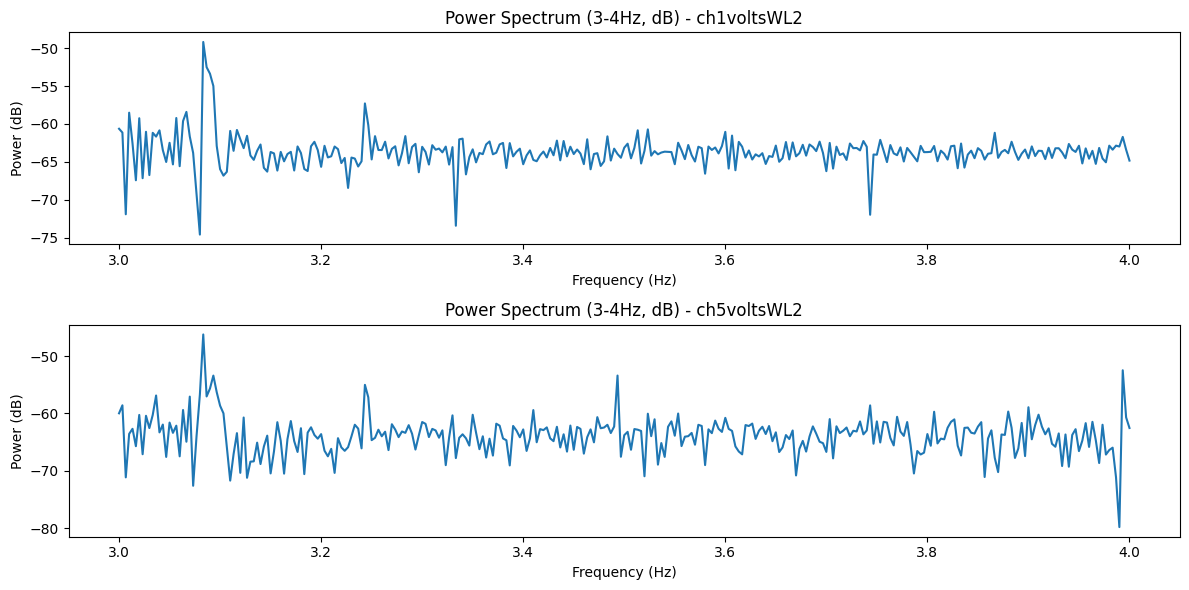

Relative Change (Time Domain) - ch1voltsWL2: 0.005221932114882504
Relative Change (Time Domain) - ch5voltsWL2: 0.06210315734539451
MHR Relative Change (Frequency Domain) - ch1voltsWL2: 0.0020559483681030365
MHR Relative Change (Frequency Domain) - ch5voltsWL2: 0.007261236666173506


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')

# 采样频率
fs = 80

# 提取ch1voltsWL2和ch5voltsWL2列
ch1voltsWL2 = df3['ch1voltsWL2']
ch5voltsWL2 = df3['ch5voltsWL2']

# FFT变换
fft_ch1voltsWL2 = np.fft.fft(ch1voltsWL2)
fft_ch5voltsWL2 = np.fft.fft(ch5voltsWL2)

# 将频谱转换为功率谱
power_spectra = {}
power_spectra['ch1voltsWL2'] = np.abs(fft_ch1voltsWL2)**2 / len(fft_ch1voltsWL2)
power_spectra['ch5voltsWL2'] = np.abs(fft_ch5voltsWL2)**2 / len(fft_ch5voltsWL2)
power_spectra['ch1voltsWL2'][0] = 0  # 排除0频率处的DC信号
power_spectra['ch5voltsWL2'][0] = 0  # 排除0频率处的DC信号

# 计算频率轴
freqs = np.fft.fftfreq(len(power_spectra['ch1voltsWL2']), 1/fs)

# 绘制功率谱图(1-4Hz, dB刻度)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
freq_range = (freqs >= 3) & (freqs <= 4)
for i, column in enumerate(['ch1voltsWL2', 'ch5voltsWL2']):
    power_db = 10 * np.log10(power_spectra[column][freq_range])
    axes[i].plot(freqs[freq_range], power_db)
    axes[i].set_title(f'Power Spectrum (3-4Hz, dB) - {column}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power (dB)')

plt.tight_layout()
plt.show()

# 确定MHR、FHR和呼吸频率的范围
mhr_freq_range = (1.5 - 0.5, 1.5 + 0.5)  # 示例范围,请根据频率谱图调整
fhr_freq_range = (3.5 - 0.5, 3.5 + 0.5)  # 示例范围,请根据频率谱图调整
resp_freq_range = (0.25 - 0.1, 0.25 + 0.1)  # 呼吸频率范围

# 时域分析
time_series = np.arange(len(ch1voltsWL2)) / fs

# 确定典型周期
mhr_period = 1 / np.mean(mhr_freq_range)
num_samples_per_period = int(mhr_period * fs)
num_periods = len(ch1voltsWL2) // num_samples_per_period

# 选取一个典型周期
typical_period_start = num_samples_per_period * (num_periods // 2)
typical_period_end = typical_period_start + num_samples_per_period
typical_period_ch1 = ch1voltsWL2[typical_period_start:typical_period_end]
typical_period_ch5 = ch5voltsWL2[typical_period_start:typical_period_end]

Imax_ch1 = np.max(typical_period_ch1)
Imin_ch1 = np.min(typical_period_ch1)
relative_change_time_domain_ch1 = (Imax_ch1 - Imin_ch1) / Imax_ch1
print(f'Relative Change (Time Domain) - ch1voltsWL2: {relative_change_time_domain_ch1}')

Imax_ch5 = np.max(typical_period_ch5)
Imin_ch5 = np.min(typical_period_ch5)
relative_change_time_domain_ch5 = (Imax_ch5 - Imin_ch5) / Imax_ch5
print(f'Relative Change (Time Domain) - ch5voltsWL2: {relative_change_time_domain_ch5}')

# 频域分析
# 滤波以提取MHR、FHR和呼吸频率的具体信号
mhr_mask = (freqs >= mhr_freq_range[0]) & (freqs <= mhr_freq_range[1])
fhr_mask = (freqs >= fhr_freq_range[0]) & (freqs <= fhr_freq_range[1])
resp_mask = (freqs >= resp_freq_range[0]) & (freqs <= resp_freq_range[1])

mhr_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][mhr_mask])
fhr_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][fhr_mask])
resp_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][resp_mask])

mhr_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][mhr_mask])
fhr_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][fhr_mask])
resp_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][resp_mask])

# 计算总功率(排除DC、FHR和呼吸频率)
total_power_ch1 = np.sum(power_spectra['ch1voltsWL2']) - power_spectra['ch1voltsWL2'][0] - fhr_power_ch1 - resp_power_ch1
total_power_ch5 = np.sum(power_spectra['ch5voltsWL2']) - power_spectra['ch5voltsWL2'][0] - fhr_power_ch5 - resp_power_ch5

# 计算MHR频域相对变化
mhr_relative_change_freq_ch1 = mhr_power_ch1 / total_power_ch1
mhr_relative_change_freq_ch5 = mhr_power_ch5 / total_power_ch5

print(f'MHR Relative Change (Frequency Domain) - ch1voltsWL2: {mhr_relative_change_freq_ch1}')
print(f'MHR Relative Change (Frequency Domain) - ch5voltsWL2: {mhr_relative_change_freq_ch5}')

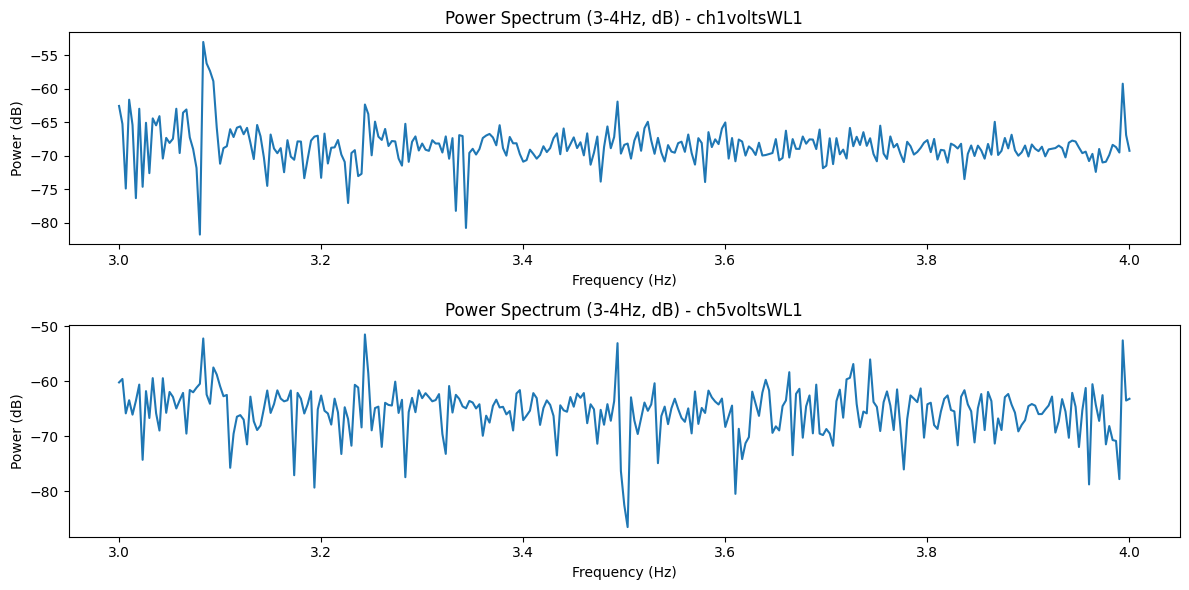

Relative Change (Time Domain) - ch1voltsWL1: 0.017430231450614328
Relative Change (Time Domain) - ch5voltsWL1: 0.05103702130671759
MHR Relative Change (Frequency Domain) - ch1voltsWL1: 0.00044628192414694596
MHR Relative Change (Frequency Domain) - ch5voltsWL1: 0.0021324703210207257


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')


fs = 80

fft_results = {}
for column in df2.columns:
    if 'WL1' in column:
        fft_results[column] = np.fft.fft(df2[column])

#功率谱
power_spectra = {}
for column in fft_results:
    power_spectra[column] = np.abs(fft_results[column])**2 / len(fft_results[column])
    power_spectra[column][0] = 0  # 排除0频率处的DC信号


fig, axes = plt.subplots(nrows=len(fft_results), ncols=1, figsize=(12, len(fft_results)*3))
freqs = np.fft.fftfreq(len(df2), 1/fs)
freq_range = (freqs >= 3) & (freqs <= 4)
for i, column in enumerate(fft_results):
    power_db = 10 * np.log10(power_spectra[column][freq_range])
    axes[i].plot(freqs[freq_range], power_db)
    axes[i].set_title(f'Power Spectrum (3-4Hz, dB) - {column}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power (dB)')

plt.tight_layout()
plt.show()

# MHR、FHR和呼吸频率的范围
mhr_freq_range = (1.5, 1.6) 
fhr_freq_range = (3.5 - 0.5, 3.5 + 0.5)  
resp_freq_range = (0.25 - 0.1, 0.25 + 0.1)  


ch1voltsWL1 = df3['ch1voltsWL1']
ch5voltsWL1 = df3['ch5voltsWL1']


time_series = np.arange(len(ch1voltsWL1)) / fs

mhr_period = 1 / np.mean(mhr_freq_range)
num_samples_per_period = int(mhr_period * fs)
num_periods = len(ch1voltsWL1) // num_samples_per_period


typical_period_start = num_samples_per_period * (num_periods // 2)
typical_period_end = typical_period_start + num_samples_per_period
typical_period_ch1 = ch1voltsWL1[typical_period_start:typical_period_end]
typical_period_ch5 = ch5voltsWL1[typical_period_start:typical_period_end]

Imax_ch1 = np.max(typical_period_ch1)
Imin_ch1 = np.min(typical_period_ch1)
relative_change_time_domain_ch1 = (Imax_ch1 - Imin_ch1) / Imax_ch1
print(f'Relative Change (Time Domain) - ch1voltsWL1: {relative_change_time_domain_ch1}')

Imax_ch5 = np.max(typical_period_ch5)
Imin_ch5 = np.min(typical_period_ch5)
relative_change_time_domain_ch5 = (Imax_ch5 - Imin_ch5) / Imax_ch5
print(f'Relative Change (Time Domain) - ch5voltsWL1: {relative_change_time_domain_ch5}')

fft_ch1voltsWL1 = np.fft.fft(ch1voltsWL1)
fft_ch5voltsWL1 = np.fft.fft(ch5voltsWL1)
freqs = np.fft.fftfreq(len(ch1voltsWL1), 1/fs)

mhr_mask = (freqs >= mhr_freq_range[0]) & (freqs <= mhr_freq_range[1])
fhr_mask = (freqs >= fhr_freq_range[0]) & (freqs <= fhr_freq_range[1])
resp_mask = (freqs >= resp_freq_range[0]) & (freqs <= resp_freq_range[1])

mhr_power_ch1 = np.sum(power_spectra['ch1voltsWL1'][mhr_mask])
fhr_power_ch1 = np.sum(power_spectra['ch1voltsWL1'][fhr_mask])
resp_power_ch1 = np.sum(power_spectra['ch1voltsWL1'][resp_mask])

mhr_power_ch5 = np.sum(power_spectra['ch5voltsWL1'][mhr_mask])
fhr_power_ch5 = np.sum(power_spectra['ch5voltsWL1'][fhr_mask])
resp_power_ch5 = np.sum(power_spectra['ch5voltsWL1'][resp_mask])

# 总功率(排除DC、FHR和呼吸频率)
total_power_ch1 = np.sum(power_spectra['ch1voltsWL1']) - power_spectra['ch1voltsWL1'][0] - fhr_power_ch1 - resp_power_ch1
total_power_ch5 = np.sum(power_spectra['ch5voltsWL1']) - power_spectra['ch5voltsWL1'][0] - fhr_power_ch5 - resp_power_ch5

# MHR频域相对变化
mhr_relative_change_freq_ch1 = mhr_power_ch1 / total_power_ch1
mhr_relative_change_freq_ch5 = mhr_power_ch5 / total_power_ch5

print(f'MHR Relative Change (Frequency Domain) - ch1voltsWL1: {mhr_relative_change_freq_ch1}')
print(f'MHR Relative Change (Frequency Domain) - ch5voltsWL1: {mhr_relative_change_freq_ch5}')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')

# 采样频率
fs = 80

# 提取ch1voltsWL2和ch5voltsWL2列
ch1voltsWL2 = df3['ch1voltsWL2']
ch5voltsWL2 = df3['ch5voltsWL2']

# 确定MHR、FHR和呼吸频率的范围
mhr_freq_range = (1.5 - 0.5, 1.5 + 0.5)  # 示例范围,请根据频率谱图调整
fhr_freq_range = (3.5 - 0.5, 3.5 + 0.5)  # 示例范围,请根据频率谱图调整
resp_freq_range = (0.25 - 0.1, 0.25 + 0.1)  # 呼吸频率范围

# FFT变换
fft_ch1voltsWL2 = np.fft.fft(ch1voltsWL2)
fft_ch5voltsWL2 = np.fft.fft(ch5voltsWL2)

# 将频谱转换为功率谱
power_spectra = {}
power_spectra['ch1voltsWL2'] = np.abs(fft_ch1voltsWL2)**2 / len(fft_ch1voltsWL2)
power_spectra['ch5voltsWL2'] = np.abs(fft_ch5voltsWL2)**2 / len(fft_ch5voltsWL2)
power_spectra['ch1voltsWL2'][0] = 0  # 排除0频率处的DC信号
power_spectra['ch5voltsWL2'][0] = 0  # 排除0频率处的DC信号

# 计算频率轴
freqs = np.fft.fftfreq(len(power_spectra['ch1voltsWL2']), 1/fs)

# 频域分析
# 滤波以提取MHR、FHR和呼吸频率的具体信号
mhr_mask = (freqs >= mhr_freq_range[0]) & (freqs <= mhr_freq_range[1])
fhr_mask = (freqs >= fhr_freq_range[0]) & (freqs <= fhr_freq_range[1])
resp_mask = (freqs >= resp_freq_range[0]) & (freqs <= resp_freq_range[1])

mhr_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][mhr_mask])
fhr_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][fhr_mask])
resp_power_ch1 = np.sum(power_spectra['ch1voltsWL2'][resp_mask])

mhr_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][mhr_mask])
fhr_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][fhr_mask])
resp_power_ch5 = np.sum(power_spectra['ch5voltsWL2'][resp_mask])

# 计算总功率(排除DC、MHR和呼吸频率)
total_power_ch1_fhr = np.sum(power_spectra['ch1voltsWL2']) - power_spectra['ch1voltsWL2'][0] - mhr_power_ch1 - resp_power_ch1
total_power_ch5_fhr = np.sum(power_spectra['ch5voltsWL2']) - power_spectra['ch5voltsWL2'][0] - mhr_power_ch5 - resp_power_ch5

# 计算MHR和FHR频域相对变化
mhr_relative_change_freq_ch1 = mhr_power_ch1 / total_power_ch1_fhr
mhr_relative_change_freq_ch5 = mhr_power_ch5 / total_power_ch5_fhr
fhr_relative_change_freq_ch5 = fhr_power_ch5 / total_power_ch5_fhr

print(f'MHR Relative Change (Frequency Domain) - ch1voltsWL2: {mhr_relative_change_freq_ch1}')
print(f'MHR Relative Change (Frequency Domain) - ch5voltsWL2: {mhr_relative_change_freq_ch5}')
print(f'FHR Relative Change (Frequency Domain) - ch5voltsWL2: {fhr_relative_change_freq_ch5}')

# 时域分析
time_series = np.arange(len(ch1voltsWL2)) / fs

# 确定典型周期
fhr_period = 1 / np.mean(fhr_freq_range)
num_samples_per_period = int(fhr_period * fs)
num_periods = len(ch5voltsWL2) // num_samples_per_period

# 选取一个典型周期
typical_period_start = num_samples_per_period * (num_periods // 2)
typical_period_end = typical_period_start + num_samples_per_period
typical_period_ch5 = ch5voltsWL2[typical_period_start:typical_period_end]

# 计算典型周期内的DC值
dc_value = np.mean(typical_period_ch5)

# 滤波提取FHR信号
fhr_signal = np.fft.ifft(fft_ch5voltsWL2 * fhr_mask).real

# 添加DC值作为偏置
fhr_signal_with_dc = fhr_signal + dc_value

# 计算FHR信号的相对变化
Imax_fhr = np.max(fhr_signal_with_dc)
Imin_fhr = np.min(fhr_signal_with_dc)
relative_change_time_domain_fhr = (Imax_fhr - Imin_fhr) / Imax_fhr

print(f'FHR Relative Change (Time Domain) - ch5voltsWL2: {relative_change_time_domain_fhr}')

MHR Relative Change (Frequency Domain) - ch1voltsWL2: 0.0020567643494533005
MHR Relative Change (Frequency Domain) - ch5voltsWL2: 0.007309705562022869
FHR Relative Change (Frequency Domain) - ch5voltsWL2: 0.000634686129705678
FHR Relative Change (Time Domain) - ch5voltsWL2: 0.02154139907870819


C:\Users\22877\AppData\Roaming\Python\Python311\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
C:\Users\22877\AppData\Local\Temp\ipykernel_18180\4090050627.py:62: RuntimeWarning: divide by zero encountered in log10
  fft_amplitude_db = 20 * np.log10(fft_amplitude)


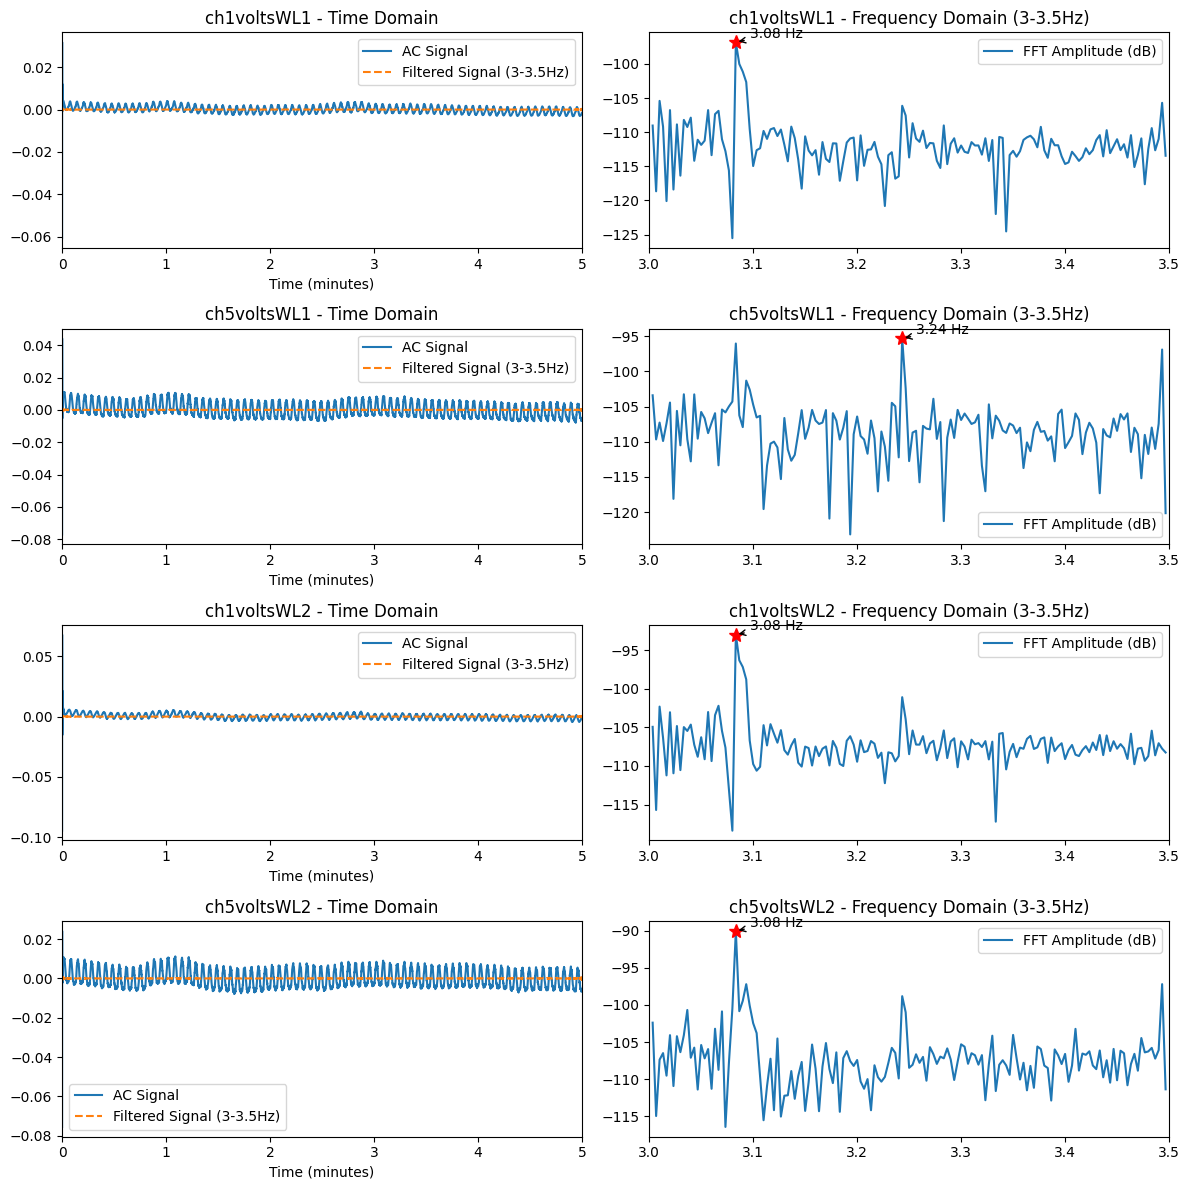

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 加载数据
df3_path = 'D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv'
df3 = pd.read_csv(df3_path)
fs = 80  # 采样频率

def bandpass_filter(freq, lowcut=3.0, highcut=3.5):
    return (freq > lowcut) & (freq < highcut)

def remove_harmonics(freqs, fft_amplitude, harmonic_threshold=0.1):
    peaks, _ = find_peaks(fft_amplitude, height=harmonic_threshold)
    filtered_fft_amplitude = np.copy(fft_amplitude)
    for f in freqs[peaks]:
        harmonics = np.arange(2, int(freqs[-1] / f) + 1) * f
        for harmonic in harmonics:
            harmonic_idx = np.argmin(np.abs(freqs - harmonic))
            filtered_fft_amplitude[max(0, harmonic_idx-1):harmonic_idx+2] = 0
    return filtered_fft_amplitude

# 频率
freqs = np.fft.fftfreq(len(df3), 1/fs)

# 单独计算并去除每列的DC分量
df3_ac = df3.copy()
for column in df3.columns:
    dc_component = df3[column][100:].mean()
    df3_ac[column] = df3[column] - dc_component

# 应用带通滤波器并去除谐波
filtered_fft = {}
for column in df3_ac.columns:
    fft_result = np.fft.fft(df3_ac[column])
    filter_mask = bandpass_filter(freqs, 3.0, 3.5)
    filtered_fft_amplitude = np.copy(fft_result)
    filtered_fft_amplitude[~filter_mask] = 0
    filtered_fft_amplitude = remove_harmonics(freqs, filtered_fft_amplitude)
    filtered_fft[column] = filtered_fft_amplitude

# 逆FFT重构信号
reconstructed_signals = {column: np.fft.ifft(filtered_fft[column]).real for column in filtered_fft}

# 绘制时域图和频域图
total_time_minutes = len(df3_ac) / fs / 60
time_vector = np.linspace(0, total_time_minutes, len(df3_ac))
n_columns = len(df3_ac.columns)
fig, axes = plt.subplots(nrows=n_columns, ncols=2, figsize=(12, n_columns*3))
for i, column in enumerate(df3_ac.columns):
    # 时域图
    axes[i, 0].plot(time_vector, df3_ac[column], label='AC Signal')
    axes[i, 0].plot(time_vector, reconstructed_signals[column], label='Filtered Signal (3-3.5Hz)', linestyle='--')
    axes[i, 0].set_xlim(0, total_time_minutes)
    axes[i, 0].set_xlabel('Time (minutes)')
    axes[i, 0].set_title(f'{column} - Time Domain')
    axes[i, 0].legend()
    
    # 频域图，转换为dB尺度
    fft_amplitude = np.abs(filtered_fft[column]) / len(df3_ac)
    fft_amplitude_db = 20 * np.log10(fft_amplitude)
    freqs_positive = freqs[:len(df3_ac)//2]
    fft_amplitude_positive_db = fft_amplitude_db[:len(df3_ac)//2]
    axes[i, 1].plot(freqs_positive, fft_amplitude_positive_db, label='FFT Amplitude (dB)')
    if len(fft_amplitude_positive_db) > 0:  # 确保有数据可绘制
        peak_freq = freqs_positive[np.argmax(fft_amplitude_positive_db)]
        peak_amplitude_db = np.max(fft_amplitude_positive_db)
        axes[i, 1].plot(peak_freq, peak_amplitude_db, 'r*', markersize=10)
        axes[i, 1].annotate(f'{peak_freq:.2f} Hz', xy=(peak_freq, peak_amplitude_db), xytext=(10, 3), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    axes[i, 1].set_xlim(3, 3.5)
    axes[i, 1].set_title(f'{column} - Frequency Domain (3-3.5Hz)')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


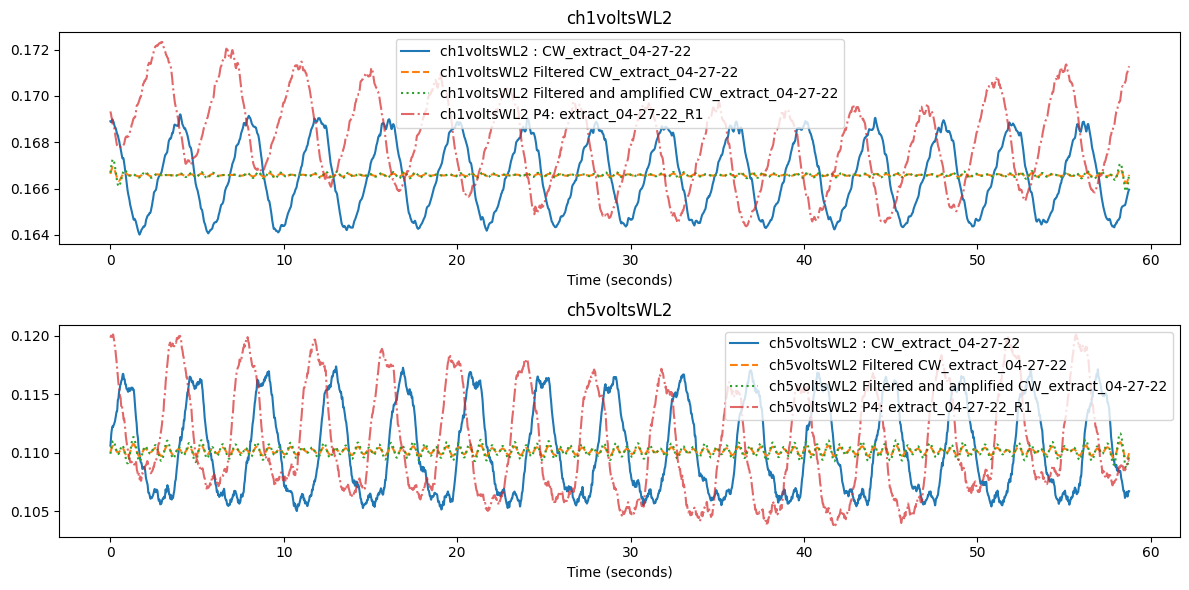

In [13]:

# 读取数据
df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\CW_extract_04-27-22.csv')
df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')

# 提取感兴趣的列
columns_of_interest = ['ch1voltsWL2', 'ch5voltsWL2']
df2 = df2[columns_of_interest]

# 排除df1中前1000个数据点
start_index = 100
df1 = df1.iloc[start_index:]

df1_rows = len(df1)

# 截断df2以匹配df1的行数
df2 = df2.iloc[start_index:start_index+df1_rows]

# 采样频率
fs = 80  # 采样频率设置为80Hz

time_axis = np.arange(df1_rows) / fs

# FFT变换
fft_results = {}
for column in df1.columns:
    fft_results[column] = np.fft.fft(df1[column])

# 设计滤波器
def bandpass_filter(freq, lowcut=1.0, highcut=2.0):
    return (freq > lowcut) & (freq < highcut)

# 应用滤波器
filtered_fft = {}
freqs = np.fft.fftfreq(len(df1), 1/fs)
for column in fft_results:
    filter_mask = bandpass_filter(freqs, 1.5 - 0.5, 1.5 + 0.5)
    filtered_fft[column] = np.copy(fft_results[column])
    filtered_fft[column][~filter_mask] = 0

# 逆FFT变换
reconstructed_signals = {column: np.fft.ifft(filtered_fft[column]).real for column in filtered_fft}

# 扩大滤波后的信号
amplified_signals = {column: signal * 2 for column, signal in reconstructed_signals.items()}  # 扩大2倍

# DC部分的值
dc_values = {
    'ch1voltsWL2': 0.16658099127567208,
    'ch5voltsWL2': 0.11014730405743865
}

# 加上DC部分
for column in df1.columns:
    if column in dc_values:
        df1[column] += dc_values[column]
        reconstructed_signals[column] += dc_values[column]
        amplified_signals[column] += dc_values[column]

# 绘制图表
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

for i, column in enumerate(columns_of_interest):
    if column in df1.columns:
        # 绘制 df1 的处理后结果
        axes[i].plot(time_axis, df1[column], label=f'{column} : CW_extract_04-27-22')
        axes[i].plot(time_axis, reconstructed_signals[column], label=f'{column} Filtered CW_extract_04-27-22', linestyle='--')
        axes[i].plot(time_axis, amplified_signals[column], label=f'{column} Filtered and amplified CW_extract_04-27-22', linestyle=':')

        # 绘制 df2 的原始数据
        axes[i].plot(time_axis, df2[column], label=f'{column} P4: extract_04-27-22_R1', linestyle='-.', alpha=0.7)

        axes[i].set_title(column)
        axes[i].set_xlabel('Time (seconds)')
        axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:

df2 = pd.read_csv('D:\Codes\CW_sheep\CW_sheep\\04272022_sheep\extract_04-27-22_R1.csv')

# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 根据您的数据实际情况来设置采样频率
samples_per_period = int(T * fs)  # 每个周期的样本数

# 初始化一个字典来存储每列所有周期平均值的列表
all_periods_avgs = {column: [] for column in df2.columns}

# 遍历每一列，计算每个周期的平均值
for column in df2.columns:
    # 计算周期平均值
    for i in range(0, len(df2[column]), samples_per_period):
        period_data = df2[column].iloc[i:i + samples_per_period]
        if len(period_data) == samples_per_period:  # 确保周期完整
            period_avg = period_data.mean()
            all_periods_avgs[column].append(period_avg)

# 计算并打印每列所有周期平均值的整体平均值
for column in all_periods_avgs:
    overall_avg = np.mean(all_periods_avgs[column])
    print(f"{column} - Overall Average Across Periods: {overall_avg}")


ch1voltsWL1 - Overall Average Across Periods: 0.10487294101686426
ch5voltsWL1 - Overall Average Across Periods: 0.13717053560694606
ch1voltsWL2 - Overall Average Across Periods: 0.16658099127567208
ch5voltsWL2 - Overall Average Across Periods: 0.11014730405743865


## delta_ua simulation

In [ ]:
# 735nm L 
path4 = 'D:\Codes\CW_sheep\CW_sheep\\4layer_pathlength_735nm_1cmSD_120Mphotons.mat'

data4 = scipy.io.loadmat(path4)

key4 = list(data4.keys())[-1]  
df4 = pd.DataFrame(data4[key4])

df4 = df4.rename(columns={
    0: 'L1',
    1: 'L2',
    2: 'L3',
    3: 'L4'
})
print(df4)



#850nm L
path5 = 'D:\Codes\CW_sheep\CW_sheep\\4layer_pathlength_850nm_1cmSD_120Mphotons.mat'

data5 = scipy.io.loadmat(path5)

key5 = list(data5.keys())[-1]  
df5 = pd.DataFrame(data5[key5])

df5 = df5.rename(columns={
    0: 'L1',
    1: 'L2',
    2: 'L3',
    3: 'L4'
})
print(df5)


               L1          L2   L3   L4
0       54.753288    0.000000  0.0  0.0
1       78.021431    0.000000  0.0  0.0
2       90.904373    0.000000  0.0  0.0
3       64.026131    0.000000  0.0  0.0
4      100.246094    0.000000  0.0  0.0
...           ...         ...  ...  ...
76983  791.668518  105.075806  0.0  0.0
76984  206.021210    0.000000  0.0  0.0
76985  846.656433  310.908875  0.0  0.0
76986  158.841934    0.000000  0.0  0.0
76987  243.857040    0.000000  0.0  0.0

[76988 rows x 4 columns]
               L1          L2         L3          L4
0       76.847389    0.000000   0.000000    0.000000
1       93.969093    0.000000   0.000000    0.000000
2       70.635590    0.000000   0.000000    0.000000
3       54.342648    0.000000   0.000000    0.000000
4      101.691292    0.000000   0.000000    0.000000
...           ...         ...        ...         ...
83859  107.901711    0.000000   0.000000    0.000000
83860  150.270004    0.000000   0.000000    0.000000
83861  555.481323

In [ ]:
# ua setting

# Tissue Type                Layer Type     ua (mm-1)  us(mm-1)  g(unitless)
# Maternal Abdominal Wall       L1           0.009      12.003     0.9
# Maternal Uterus               L2           0.01       8.15       0.9
# Amniotic Fluid                L3           0.004      0.1        0.9
# Fetal Tissues                 L4           0.013      9.916      0.9


In [ ]:

df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')
df2 = df2.apply(pd.to_numeric, errors='coerce')

# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 采样频率

# 初始化deltas数组
deltas = np.linspace(0, 1, 100)

# 为WL1和WL2定义参数
params = {
    'WL1': {'ua1': 0.0085, 'constant': 77000, 'L1_values': df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)},
    'WL2': {'ua1': 0.0088, 'constant': 83900, 'L1_values': df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)}
}

# 创建一个空的DataFrame来存储反FFT结果
df_reconstructed = pd.DataFrame(index=df2.index)

# 遍历每一列进行FFT和反FFT处理
for column in df2.columns:
    # 获取列数据，并转换为 numpy 数组
    original_signal = df2[column].values
    signal = df2[column].values
    n = len(signal)

    # 应用 FFT
    yf = fft(signal)

    # 生成对应的频率值
    xf = np.linspace(0.0, fs/2, n//2)

    # 找到最接近1.5Hz的频率索引
    target_freq = 1.5
    index = np.where((xf >= target_freq - 0.5) & (xf <= target_freq + 0.5))[0]
    
    # 创建一个只含目标频率成分的信号
    yf_filtered = np.zeros_like(yf)
    yf_filtered[index] = yf[index]
    yf_filtered[-index] = yf[-index]  # 对称的负频率部分也要赋值

    # 应用逆FFT来重建信号
    reconstructed_signal = ifft(yf_filtered).real  # 取实部

    # 将重建的信号添加到新的DataFrame中
    df_reconstructed[column] = reconstructed_signal

    # 计算每个周期的最大值和最小值
    samples_per_period = int(T * fs)  # 每个周期的样本数
    num_periods = len(reconstructed_signal) // samples_per_period
    split_data = np.array_split(reconstructed_signal, num_periods)
    
    max_values = [np.max(period_data) for period_data in split_data if len(period_data) == samples_per_period]
    min_values = [np.min(period_data) for period_data in split_data if len(period_data) == samples_per_period]
    
    # 计算最大值和最小值的平均值
    avg_max = np.mean(max_values) * 1.2
    avg_min = np.mean(min_values) * 1.2
    
    # 计算所有周期平均值的整体平均值
    num_periods_original = len(original_signal) // samples_per_period
    split_data_original = np.array_split(original_signal, num_periods_original)
    overall_avg = np.mean([np.mean(period_data) for period_data in split_data_original if len(period_data) == samples_per_period])

    # 计算平均最大值和最小值之间的差值（avg_diff）
    avg_diff = avg_max - avg_min
    
    # 根据列选择参数
    if 'WL1' in column:
        ua1 = params['WL1']['ua1']
        constant = params['WL1']['constant']
        L1_values = params['WL1']['L1_values']
    else:
        ua1 = params['WL2']['ua1']
        constant = params['WL2']['constant']
        L1_values = params['WL2']['L1_values']

    # 计算方程左边的值
    left_side = -np.log10((overall_avg+avg_max)/ (overall_avg - avg_min))

    # 找到最接近的delta值
    right_sides = np.exp(np.sum(deltas[:, np.newaxis] * ua1 * L1_values, axis=1) / constant)
    index = np.argmin(np.abs(right_sides - left_side))
    best_delta = deltas[index]
    
    # 输出结果
    print(f"For column {column}:")
    print(f"Estimated Period: {samples_per_period} samples")
    print(f"Average Max per Period: {avg_max}")
    print(f"Average Min per Period: {avg_min}")
    print(f"Average Max-Min Difference per Period: {avg_diff}")
    print(f"Overall Average Across Periods: {overall_avg}")
    print(f"Best Delta corresponding to ratio: {best_delta}\n")

       


For column ch1voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00012867666276835394
Average Min per Period: -0.00013083371898714146
Average Max-Min Difference per Period: 0.0002595103817554954
Overall Average Across Periods: 0.10474620236773954
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00046924734441123564
Average Min per Period: -0.00046825418901708305
Average Max-Min Difference per Period: 0.0009375015334283188
Overall Average Across Periods: 0.1368819496855346
Best Delta corresponding to ratio: 0.0

For column ch1voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.0001159491126866053
Average Min per Period: -0.00011944372475715907
Average Max-Min Difference per Period: 0.00023539283744376436
Overall Average Across Periods: 0.16633591333703293
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.0006935078704974105

In [ ]:

df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')
df2 = df2.apply(pd.to_numeric, errors='coerce')



# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 采样频率

# 为WL1和WL2定义参数
params = {
    'WL1': {'ua1': 0.0085, 'constant': 77000, 'L1_values': df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)},
    'WL2': {'ua1': 0.0088, 'constant': 83900, 'L1_values': df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)}
}

# 初始化deltas数组
deltas = np.linspace(0, 1, 100)

# 创建一个空的DataFrame来存储反FFT结果
df_reconstructed = pd.DataFrame(index=df2.index)

# 初始化用于存储不同波长下特定通道的值的字典
channel_specific_values = {
    'Ch1': {'WL1': None, 'WL2': None}
}

for column in df2.columns:
    # 获取原始信号
    original_signal = df2[column].values
    n = len(original_signal)

    # 应用 FFT
    yf = fft(original_signal)

    # 生成对应的频率值
    xf = np.linspace(0.0, fs/2, n//2)

    # 找到最接近1.5Hz的频率索引
    target_freq = 1.5
    index = np.where((xf >= target_freq - 0.5) & (xf <= target_freq + 0.5))[0]
    
    # 创建一个只含目标频率成分的信号
    yf_filtered = np.zeros_like(yf)
    yf_filtered[index] = yf[index]
    yf_filtered[-index] = yf[-index]  # 对称的负频率部分也要赋值

    # 应用逆FFT来重建信号
    reconstructed_signal = ifft(yf_filtered).real  # 取实部

    # 将重建的信号添加到新的DataFrame中
    df_reconstructed[column] = reconstructed_signal

    # 计算重建信号的每个周期的最大值和最小值
    samples_per_period = int(T * fs)  # 每个周期的样本数
    num_periods_reconstructed = len(reconstructed_signal) // samples_per_period
    split_data_reconstructed = np.array_split(reconstructed_signal, num_periods_reconstructed)
    
    max_values = [np.max(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    min_values = [np.min(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    
    # 计算最大值和最小值的平均值
    avg_max = np.mean(max_values) * 1.2
    avg_min = np.mean(min_values) * 1.2

    # 划分原始信号为周期并计算每个周期的平均值
    num_periods_original = len(original_signal) // samples_per_period
    split_data_original = np.array_split(original_signal, num_periods_original)
    overall_avg = np.mean([np.mean(period_data) for period_data in split_data_original if len(period_data) == samples_per_period])

    # 计算方程左边的值
    left_side_value = -np.log10((overall_avg + avg_max) / (overall_avg - avg_min))
    print(f"For column {column}, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): {left_side_value}")

    # 存储特定通道的值
    if 'Ch1' in column:
        wl_key = 'WL1' if 'WL1' in column else 'WL2'
        channel_specific_values['CH1'][wl_key] = left_side_value

    # 根据列选择参数
    if 'WL1' in column:
        ua1 = params['WL1']['ua1']
        constant = params['WL1']['constant']
        L1_values = params['WL1']['L1_values']
    else:
        ua1 = params['WL2']['ua1']
        constant = params['WL2']['constant']
        L1_values = params['WL2']['L1_values']

    # 找到最接近的delta值
    right_sides = np.exp(np.sum(deltas[:, np.newaxis] * ua1 * L1_values, axis=1) / constant)
    index = np.argmin(np.abs(right_sides - left_side_value))
    best_delta = deltas[index]
    
    print(f"For column {column}:")
    print(f"Estimated Period: {samples_per_period} samples")
    print(f"Average Max per Period: {avg_max}")
    print(f"Average Min per Period: {avg_min}")
    print(f"Best Delta corresponding to ratio: {best_delta}\n")

# 打印CH1通道下不同WL的值的比值
wl1_value = channel_specific_values['Ch1']['WL1']
wl2_value = channel_specific_values['Ch1']['WL2']
if wl1_value is not None and wl2_value is not None:
    ratio = wl1_value / wl2_value
    print(f"Ratio of -log10 values for CH1 (WL1/WL2): {ratio}")
else:
    print("One or more values for CH1 are missing.")



For column ch1voltsWL1, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 8.932434418902376e-06
For column ch1voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00012867666276835394
Average Min per Period: -0.00013083371898714146
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL1, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): -3.1402963794729687e-06
For column ch5voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00046924734441123564
Average Min per Period: -0.00046825418901708305
Best Delta corresponding to ratio: 0.0

For column ch1voltsWL2, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 9.117800094069588e-06
For column ch1voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.0001159491126866053
Average Min per Period: -0.00011944372475715907
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL2, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): -4.182395857724008e-06
For column ch5

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft

# 读取 CSV 文件
df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\04272022_sheep\\extract_04-27-22_R1.csv')
df2 = df2.apply(pd.to_numeric, errors='coerce')

# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 采样频率

L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)

# 为WL1和WL2定义参数
params = {
    'WL1': {'ua1': 0.0085, 'constant': 77000, 'L1_values': LB_lambda1 },
    'WL2': {'ua1': 0.0088, 'constant': 83900, 'L1_values': LB_lambda2 }
}

# 初始化存储结构
channel_values = {
    'CH1': {'WL1': None, 'WL2': None},
    'CH5': {'WL1': None, 'WL2': None}
}

for column in df2.columns:
    # 获取原始信号
    original_signal = df2[column].values
    n = len(original_signal)

    # 应用 FFT
    yf = fft(original_signal)

    # 生成对应的频率值
    xf = np.linspace(0.0, fs/2, n//2)

    # 找到最接近1.5Hz的频率索引
    target_freq = 1.5
    index = np.where((xf >= target_freq - 0.5) & (xf <= target_freq + 0.5))[0]
    
    # 创建一个只含目标频率成分的信号
    yf_filtered = np.zeros_like(yf)
    yf_filtered[index] = yf[index]
    yf_filtered[-index] = yf[-index]  # 对称的负频率部分也要赋值

    # 应用逆FFT来重建信号
    reconstructed_signal = ifft(yf_filtered).real  # 取实部

    # 将重建的信号添加到新的DataFrame中
    df_reconstructed = pd.DataFrame(index=df2.index)
    df_reconstructed[column] = reconstructed_signal

    # 计算重建信号的每个周期的最大值和最小值
    samples_per_period = int(T * fs)  # 每个周期的样本数
    num_periods_reconstructed = len(reconstructed_signal) // samples_per_period
    split_data_reconstructed = np.array_split(reconstructed_signal, num_periods_reconstructed)
    
    max_values = [np.max(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    min_values = [np.min(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    
    # 计算最大值和最小值的平均值
    avg_max = np.mean(max_values) * 1.2
    avg_min = np.mean(min_values) * 1.2

    # 划分原始信号为周期并计算每个周期的平均值
    num_periods_original = len(original_signal) // samples_per_period
    split_data_original = np.array_split(original_signal, num_periods_original)
    overall_avg = np.mean([np.mean(period_data) for period_data in split_data_original if len(period_data) == samples_per_period])

    # 计算方程左边的值
    left_side_value = -np.log10((overall_avg + avg_max) / (overall_avg - avg_min))
    print(f"Processing column: {column}, Left Side Value: {left_side_value}")  # 调试输出


    # 存储特定通道的值
    if 'CH1' in column:
        wl_key = 'WL1' if 'WL1' in column else 'WL2'
        channel_values['CH1'][wl_key] = left_side_value
    elif 'CH5' in column:
        wl_key = 'WL1' if 'WL1' in column else 'WL2'
        channel_values['CH5'][wl_key] = left_side_value

# 计算比值
def calculate_ratio(channel_data):
    wl1_value = channel_data['WL1']
    wl2_value = channel_data['WL2']
    return wl2_value / wl1_value if wl1_value and wl2_value else None

ch1_ratio = calculate_ratio(channel_values['CH1'])
ch5_ratio = calculate_ratio(channel_values['CH5'])

# 打印结果
print(f"CH1 WL2/WL1 Ratio: {ch1_ratio}")
print(f"CH5 WL2/WL1 Ratio: {ch5_ratio}")


Processing column: ch1voltsWL1, Left Side Value: 8.932434418902376e-06
Processing column: ch5voltsWL1, Left Side Value: -3.1402963794729687e-06
Processing column: ch1voltsWL2, Left Side Value: 9.117800094069588e-06
Processing column: ch5voltsWL2, Left Side Value: -4.182395857724008e-06
CH1 WL2/WL1 Ratio: None
CH5 WL2/WL1 Ratio: None


In [ ]:
# 850nm 
# Ehb = 691  Ehbo2 = 1058 (cm-1 M-1) 

# 740nm
# Ehb = 446  Ehbo2 = 1116 (cm-1 M-1) 


# ua = Ehb * [Hb] + Ehbo2 * [Hbo2]

# Sheep1 spo2 = 100%

L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)
B1 = LB_lambda1/LB_lambda2 

# Spo2 Calculation
def spo2_cal(R):
    spo2 = (446 - R * 691 * (B1)) / (446 - 1116 + R * (1058-691) * (B1))
    return spo2

In [ ]:
print('Sheep1 spo2 check')
#Ch1 
R1 = (7.5991/7.4452)
spo2_ch1 = spo2_cal(R1)
print('channel1 spo2 values',spo2_ch1)

#Ch5
R2 = (-3.4890)/(-2.6184)
spo2_ch2 = spo2_cal(R2)
print('channel5 spo2 values',spo2_ch2)

Sheep1 spo2 check
channel1 spo2 values 0.5816073272406937
channel5 spo2 values 1.7047626986279008


In [ ]:
print('Sheep1 spo2 check')
#Ch1 
R1 = (9.1178/8.9324)
spo2_ch1 = spo2_cal(R1)
print('channel1 spo2 values',spo2_ch1)

#Ch5
R2 = (-4.1823)/(-3.1403)
spo2_ch2 = spo2_cal(R2)
print('channel5 spo2 values',spo2_ch2)



Sheep1 spo2 check
channel1 spo2 values 0.5818173206908512
channel5 spo2 values 1.7012127526047973


In [ ]:
#CH1
# 给定的消光系数
e_hbo_850nm = 1058  # ϵ_HbO^λ1
e_hb_850nm = 691   # ϵ_Hb^λ1
e_hbo_740nm = 1116  # ϵ_HbO^λ2
e_hb_740nm = 446   # ϵ_Hb^λ2

# 给定的 ΔOD 值
delta_OD_850nm = 7.599062272157824e-06
delta_OD_740nm = 7.445230586921376e-06


L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)


A = np.array([[e_hbo_850nm * LB_lambda1, e_hb_850nm * LB_lambda1],
              [e_hbo_740nm * LB_lambda2, e_hb_740nm * LB_lambda2]])

B = np.array([delta_OD_850nm, delta_OD_740nm])

delta_concentrations = np.linalg.solve(A, B)


delta_HbO, delta_Hb = delta_concentrations

print("Δ[HbO]:", delta_HbO)
print("Δ[Hb]:", delta_Hb)

S = ((delta_HbO / (delta_HbO + delta_Hb)) * 100)

print("SpO2 (%):", S)


Δ[HbO]: 2.011419363857934e-15
Δ[Hb]: 2.141249170891789e-15
SpO2 (%): 48.4367906329697


In [ ]:
#CH5
# 给定的消光系数
e_hbo_850nm = 1058  # ϵ_HbO^λ1
e_hb_850nm = 691   # ϵ_Hb^λ1
e_hbo_740nm = 1116  # ϵ_HbO^λ2
e_hb_740nm = 446   # ϵ_Hb^λ2

# 给定的 ΔOD 值
delta_OD_850nm = -3.4889722219256612e-06
delta_OD_740nm = -2.6184029982004074e-06


L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)


A = np.array([[e_hbo_850nm * LB_lambda1, e_hb_850nm * LB_lambda1],
              [e_hbo_740nm * LB_lambda2, e_hb_740nm * LB_lambda2]])

B = np.array([delta_OD_850nm, delta_OD_740nm])

delta_concentrations = np.linalg.solve(A, B)


delta_HbO, delta_Hb = delta_concentrations

print("Δ[HbO]:", delta_HbO)
print("Δ[Hb]:", delta_Hb)

S = ((delta_HbO / (delta_HbO + delta_Hb)) * 100)

print("SpO2 (%):", S)

Δ[HbO]: -1.297583225308122e-16
Δ[Hb]: -2.198435679005847e-15
SpO2 (%): 5.57334665604193
